# Data ranges

This section provides examples of how to set data ranges for a plot via keyword arguments.  Options include:
<ul>
<li>automatically calculating limits based on a percentage of the total data range</li>
<li>explicitly setting limits for a given axis</li>
<li>setting limits based on a quantile statistic</li>
<li>sharing or not sharing limits across subplots</li>
</ul>

## Setup

Import packages:

In [1]:
import fivecentplots as fcp
import pandas as pd
from pathlib import Path

Read some dummy data for examples:

In [2]:
df = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data.csv')
df_box = pd.read_csv(Path(fcp.__file__).parent / 'test_data/fake_data_box.csv')

Optionally set the design theme (skipping here and using default):

In [3]:
#fcp.set_theme('gray')
#fcp.set_theme('white')

## Default limits

When no limits are specified, **fivecentplots** will attempt to choose reasonable axis limits automatically.  This is done by subtracting or adding a percentage of the total data range to the minimum or maximum limit, respectively.  Consider the following example:

xmin=0.0, xmax=1.6
ymin=0.0, ymax=1.255


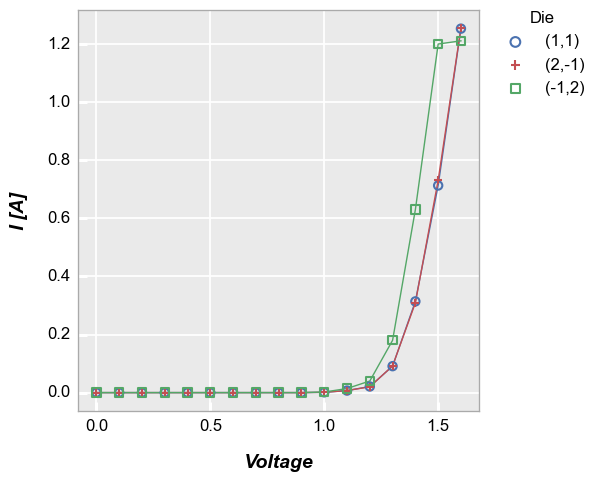

In [4]:
sub = df[(df.Substrate=='Si')&(df['Target Wavelength']==450)&(df['Boost Level']==0.2)&(df['Temperature [C]']==25)]
print('xmin=%s, xmax=%s' % (sub['Voltage'].min(), sub['Voltage'].max()))
print('ymin=%s, ymax=%s' % (sub['I [A]'].min(), sub['I [A]'].max()))
fcp.plot(sub, x='Voltage', y='I [A]', legend='Die')

Notice the actual `x` data range goes from 0 to 1.6 but the x-limits on the plot go from -0.08 to 1.68 or 5% beyond the x-range.  **fivecentplots** uses a 5% buffer on non-specified axis limits.  For a log-scaled axis, the data range is calculated as `np.log10(max_val) - np.log10(min_val)` to ensure an effective 5% buffer on the linear-scale of the plot window.  This percentage can be customized by keyword argument or in the theme file by setting `ax_limit_padding` to a percentage value.  Additionally, the padding limit can be set differently for each axis by including the axis name and min/max target in the keyword (such as `ax_limit_padding_x_min`).

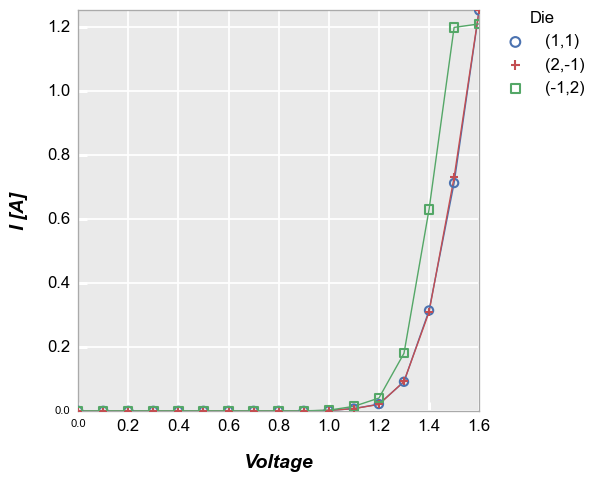

In [5]:
fcp.plot(sub, x='Voltage', y='I [A]', legend='Die', ax_limit_padding=0)

## Explicit limits

In many cases we want to plot data over a specific data range.  This is accomplished by passing limit values as keywords in the plot command.  The following axis can be specified:

* ``x`` (primary x-axis)
* ``x2`` (secondary x-axis when `twin_y=True`)
* ``y`` (primary y-axis)
* ``y2`` (secondary y-axis when `twin_x=True)
* ``z`` (primary z-axis [for heatmaps and contours this is the colorbar axis])

Each axis has a `min` or a `max` value that can be specified.  

### Primary axes only

Let's take the plot from above and zoom in to exclude most of the region where the current begins to grow exponentially.  We can do this by only specifying an `xmax` limit:

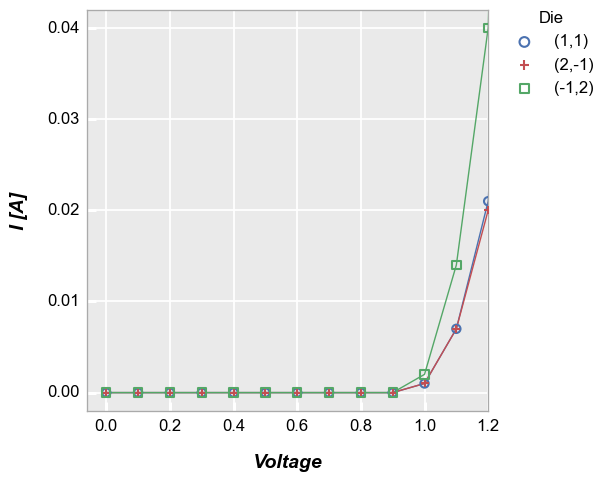

In [6]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25', 
         xmax=1.2)

Notice that although we only specified a single limit, the y-axis range has been auto-scaled to more clearly show the data that is included in the x-axis range on interest.  This scaling is controlled by the keyword `auto_scale` which is enabled by default.  Without auto-scaling the plot would look as follows:

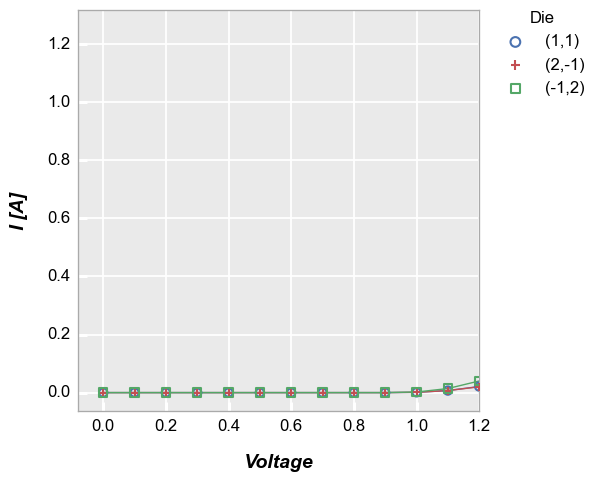

In [7]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25', 
         xmax=1.2, auto_scale=False)

Below we show the data with custom ranges for all current axes:

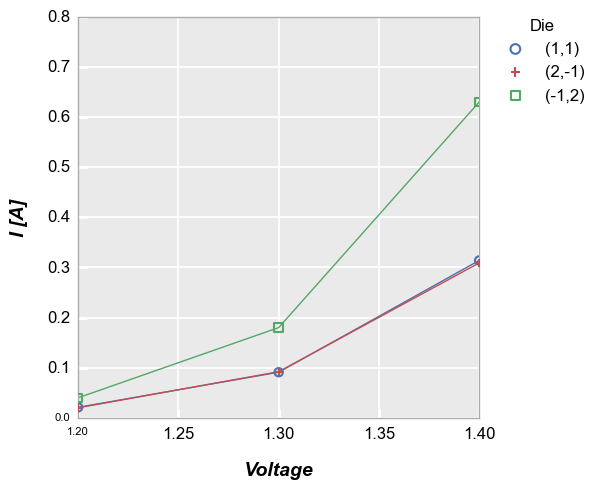

In [8]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', 
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25', 
         xmin=1.2, xmax=1.4, ymin=0, ymax=0.8)

### Secondary y-axis

Now condsider the case of a secondary y-axis:

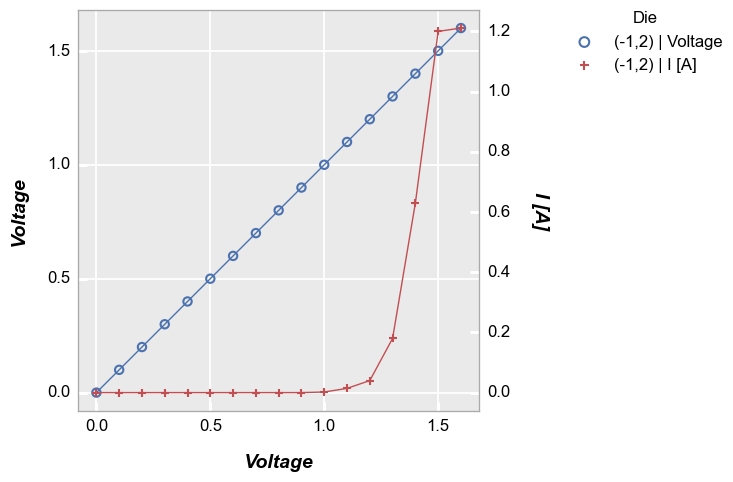

In [9]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

We add limits to the shared x-axis as follows (remember "shared" means there is only 1 possible range for the x-axis):

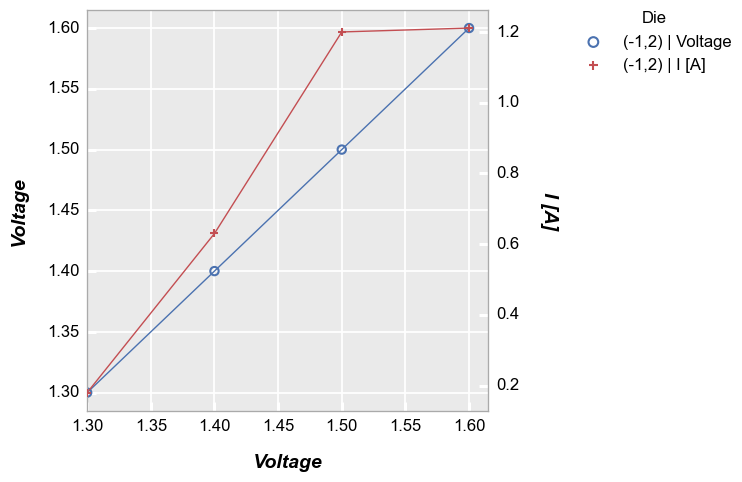

In [10]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         xmin=1.3)

Because we have a shared x-axis, both the primary and the secondary y-axis scale together when auto-scaling is enabled.  As before we can disable auto-scaling if desired to treat the primary and secondary axes separately:

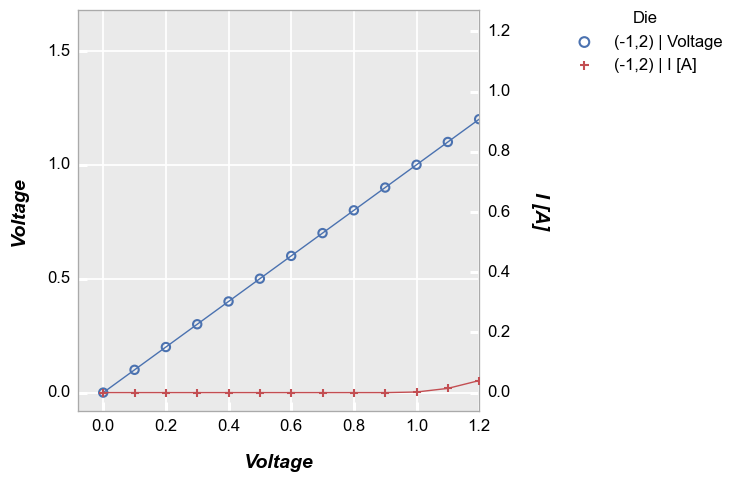

In [11]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         xmax=1.2, auto_scale=False)

A similar auto-scaling effect will happen if we specify a y-limit (or a y2-limit).  Again this is because the x-axis is shared and the auto-scaling algorithm filters the rows in the DataFrame based on our limits.  Since both the primary `y` and the secondary `y` are columns in the same DataFrame, auto-scaling impacts both.  

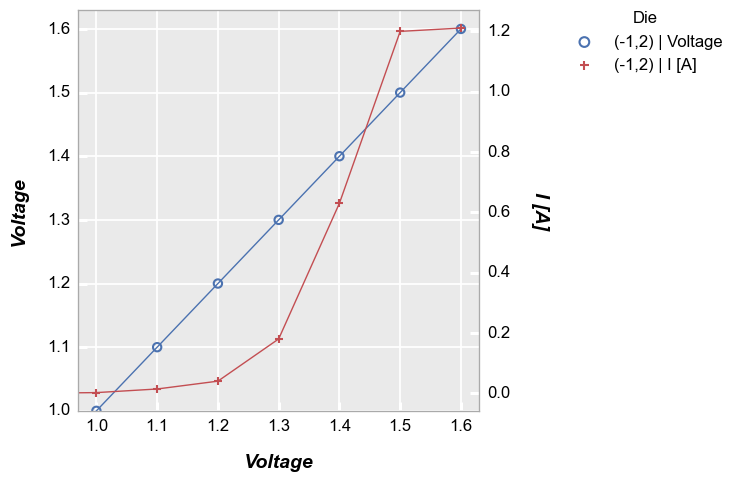

In [12]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=True, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ymin=1)

### Multiple values on same axis

Next consider the non-twinned case with more than one value assigned to a given axis:

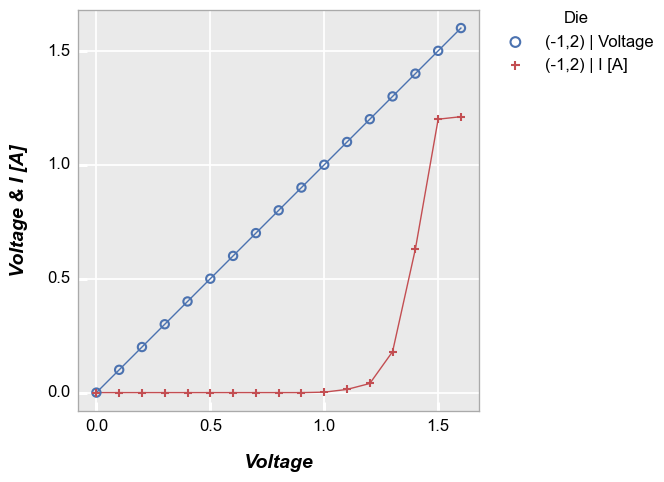

In [13]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=False, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"')

Here a y-limit is applied to both *all* the data on the y-axis so auto-scaling affects both curves:

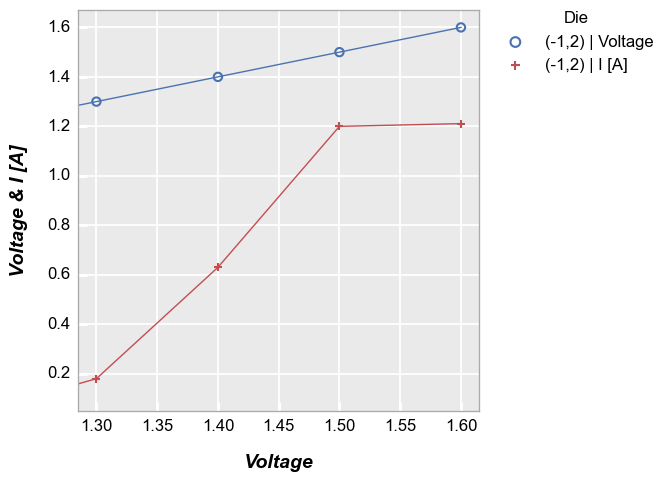

In [14]:
fcp.plot(df, x='Voltage', y=['Voltage', 'I [A]'], twin_x=False, legend='Die',
         filter='Substrate=="Si" & Target Wavelength==450 & Boost Level==0.2 & Temperature [C]==25 & Die=="(-1,2)"',
         ymin=0.05)

.. note:: Auto-scaling is not active for boxplots, contours, and heatmaps

## Statistical limits

**fivecentplots** allows you to set axis limits based on some quantile percentage of the actual data or the inter-quartile range of the data.  This is most useful when working with boxplots that contain outliers which we do not want to skew y-axis range.

### Quantiles

Quantile ranges are added to the standard min/max keywords as strings with the form: ``<quantile>q``. 

Consider the plot below in which the boxplot for sample 2 has an outlier.  The default limit will cover the entire span of the data so the `ymax` value is above this outlier.

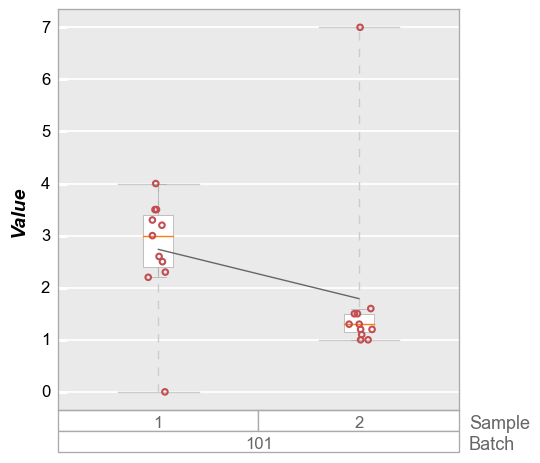

In [15]:
fcp.boxplot(df_box, y='Value', groups=['Batch', 'Sample'], filter='Batch==101')

Obviously we could manually set a `ymax` value to exclude this outlier, but in the case of automated plot generation we likely do not know the outlier exists in advance.  Instead, we can specify a 95% quantile limit to exclude tail points in the distribution. For boxplots, if the `range_lines` option is enabled, we can still visualize that there is an outlier in the data set that exceeds the y-axis range

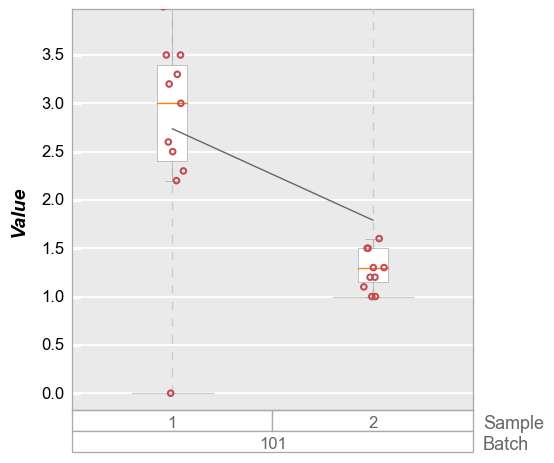

In [16]:
fcp.boxplot(df_box, y='Value', groups=['Batch', 'Sample'], filter='Batch==101', ymax='q95')

### Inter-quartile range

In some cases we may want to set a limit based on the inter-quartile range of the data set (i.e., the delta between the 25% and 75% quantiles).  This can also help to deal with outlier data.  The value supplied to the range keyword(s) is a string of the form: ``<factor>*iqr``, where "factor" is a float value to be multiplied to the inter-quartile range.

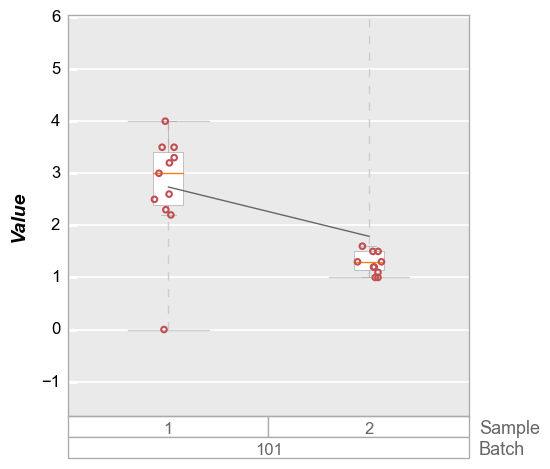

In [17]:
fcp.boxplot(df_box, y='Value', groups=['Batch', 'Sample'], filter='Batch==101', 
            ymin='1.5*iqr', ymax='1.5*iqr')

## Axes sharing

Axes sharing applies when using `row`, `col`, or `wrap` grouping to split the plot into multiple subplots.  The boolean keywords of interest are:
* ``share_x``
* ``share_x2``
* ``share_y``
* ``share_y2``
* ``share_z``

### Shared axes

By default, grid plots share axes ranges (and tick labels) for all axes.  Because axes are shared, the tick labels and axis labels only appear on the outermost subplots:

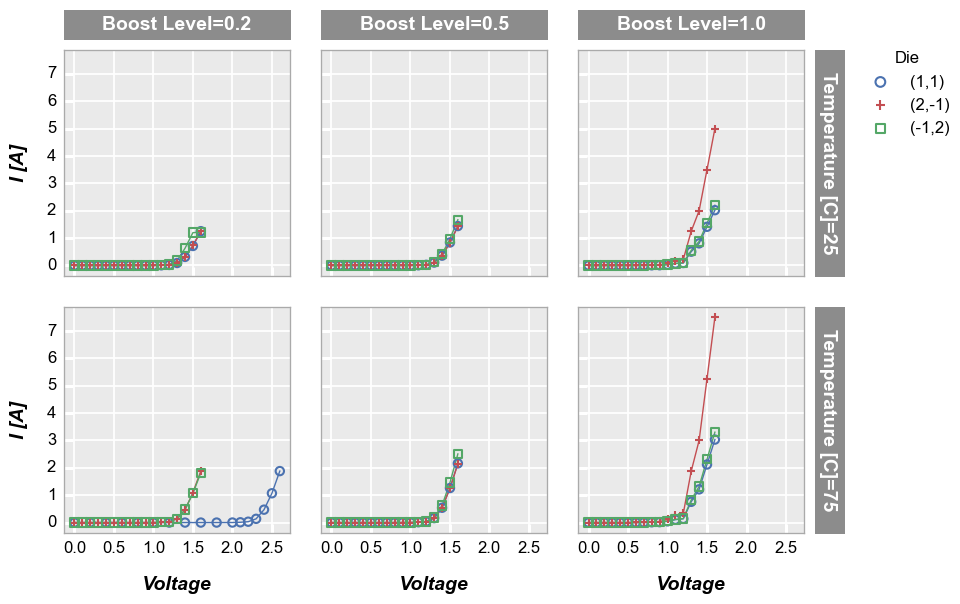

In [18]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', 
         filter='Substrate=="Si" & Target Wavelength==450',
         ax_size=[225, 225])

Sharing can be disabled by setting the `share_` keyword for one or more of the axes to `False`.  Notice that tick labels are added automatically and the spacing between plots is adjusted.  

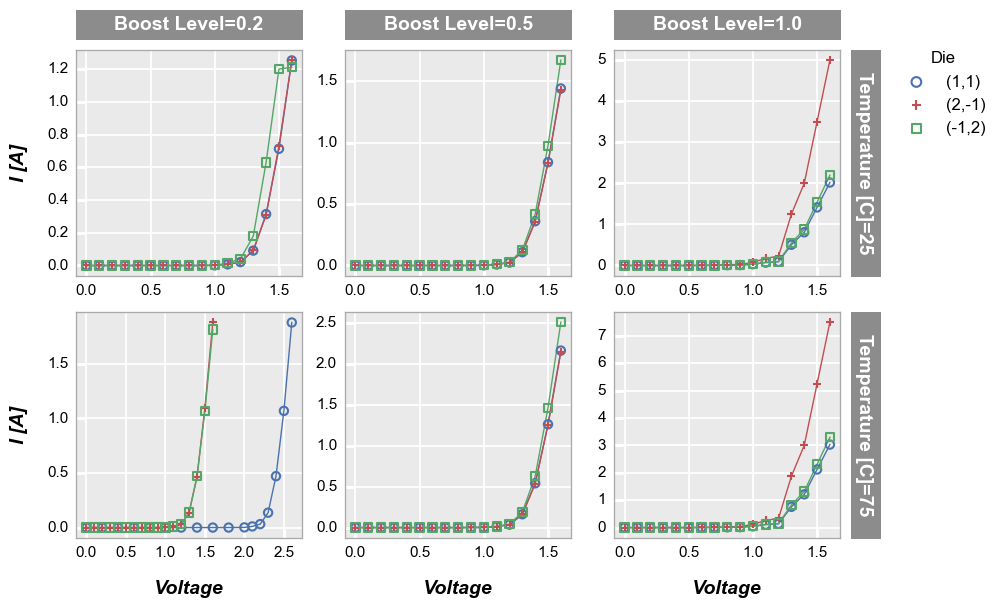

In [19]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]',
         filter='Substrate=="Si" & Target Wavelength==450',
         ax_size=[225, 225], share_x=False, share_y=False, tick_labels_font_size=11)

We can also force shared axes to display their own tick labels and/or axis labels using the keywords `separate_ticks` and `separate_labels`.

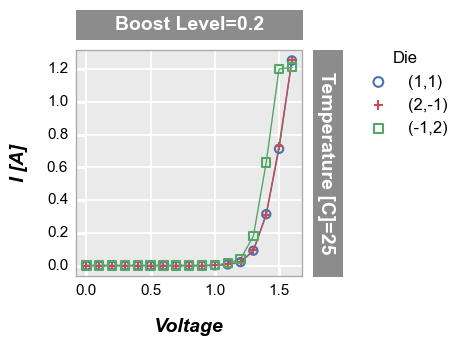

In [20]:
fcp.plot(df=sub, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]',
         filter='Substrate=="Si" & Target Wavelength==450',
         ax_size=[225, 225], separate_ticks=True, separate_labels=True, tick_labels_font_size=11)

.. note:  For ``wrap`` plots based on column values, axis sharing is forced to ``True`` and cannot be overridden

### Share rows

For `row` plots, we can opt to share both the x- and y-axis range uniquely across each row of subplots via the `share_row` keyword:

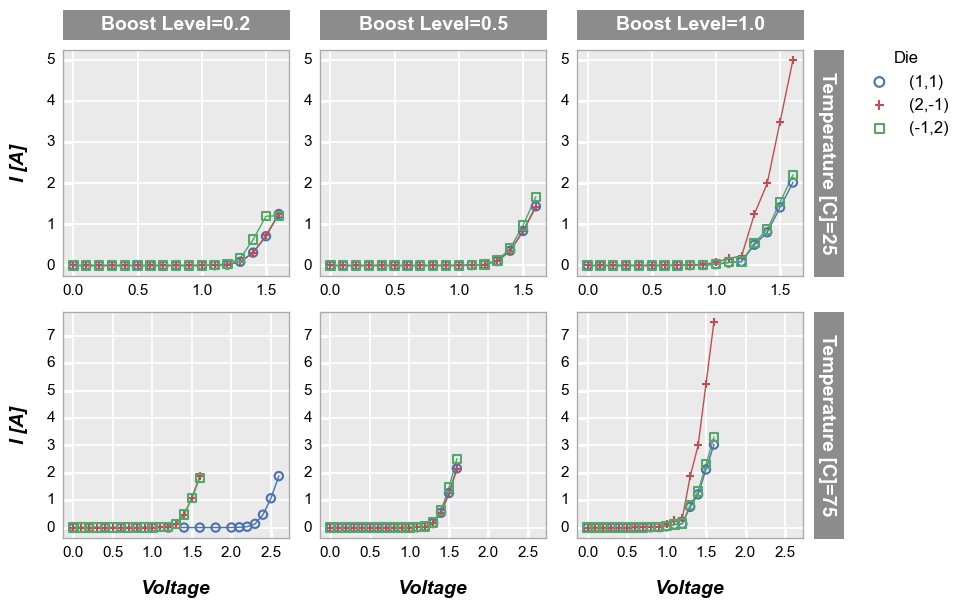

In [21]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', 
         filter='Substrate=="Si" & Target Wavelength==450',
         ax_size=[225, 225], share_row=True, tick_labels_font_size=11)

### Share columns

Similarly for `col` plots, we can opt to share the both the x- and y-axis range uniquely across each column of subplots via the `share_col` keyword:

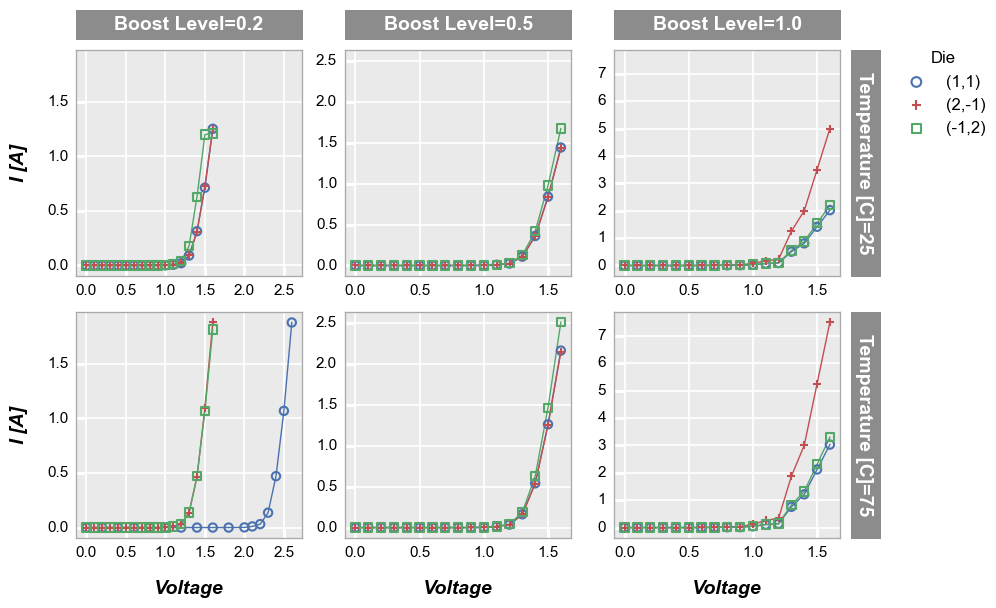

In [22]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', 
         filter='Substrate=="Si" & Target Wavelength==450',
         ax_size=[225, 225], share_col=True, tick_labels_font_size=11)

### No sharing

Lastly, we can specify unique axes ranges for each plot.  Each axes range variable (`xmin`, `xmax`, `ymin`, `ymax`, etc.), is a special `fcp` data type called `RepeatedList` (note this is the same data type used for specifying line color, markers, alpha, etc.).  The `RepeatedList` class simply loops over a list of any arbitrary size with increasing index.  When applied to axis ranges, this means we can specify:
* a single value that loops to give the same value for each subplot index
* a list of ranges for each plot in the grid (no looping occurs in this case)
* or a partial list of ranges that is repeated (for example, a two-value list would be applied in repeating fashion to odd- and even-indexed subplots)

Subplot index starts at 0 and increases column by column along a given row until the last column and then moves to the next row and continues incrementing.

Consider the following example.  We have size subplots with index 0, 1, 2 on the first row and 3, 4, 5 on the second.  We supply 5 `xmin` values and 6 `ymax` values.  The `ymax` value has been uniquely specified for each plot.  However, the `xmin` value for the final plot is not uniquely specified, so the `RepeatedList` will loop back to the first value supplied. 

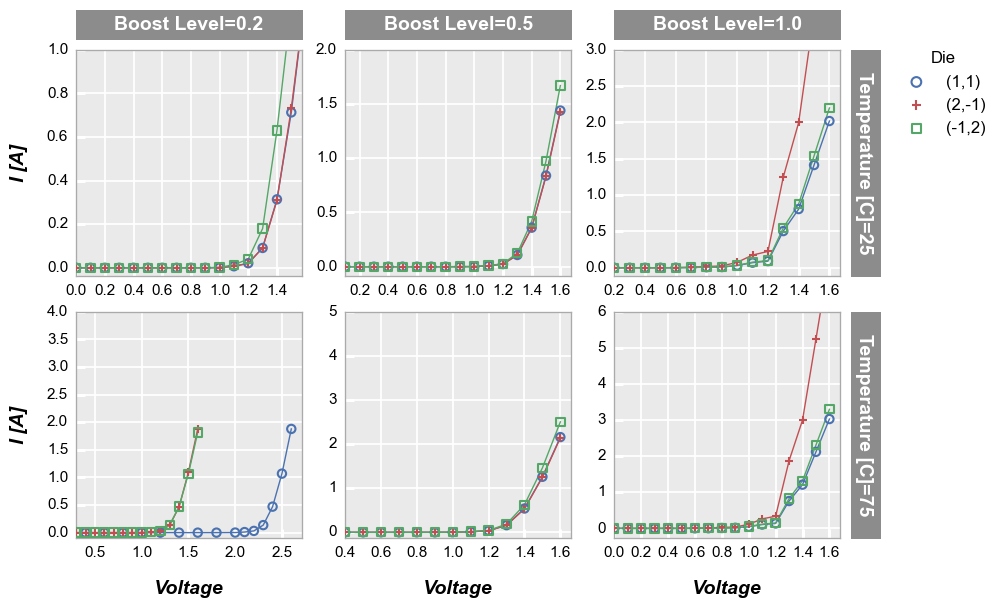

In [23]:
fcp.plot(df, x='Voltage', y='I [A]', legend='Die', col='Boost Level', row='Temperature [C]', 
         ax_size=[225, 225], filter='Substrate=="Si" & Target Wavelength==450', label_rc_font_size=14,
         xmin=[0, 0.1, 0.2, 0.3, 0.4], ymax=[1, 2, 3, 4, 5, 6], tick_labels_font_size=11)